In [33]:

# multivariate output multi-step 1d cnn example
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import Input, TimeDistributed, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape,GRU, LeakyReLU, Reshape,Permute,ConvLSTM2D,ConvLSTM1D,Conv1D	,UpSampling2D,Conv2DTranspose,ZeroPadding2D,UpSampling1D,Cropping1D,Lambda,LSTM,RepeatVector
from keras.models import Model
import matplotlib.pyplot as plt

In [34]:
import pandas as pd

In [35]:
data = pd.read_excel('data.xlsx', sheet_name="Konya", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,193,92198.0400,51865.8000,2262.7900,5.1,0.8,-6.4,-12.7,-3.0,-2.1,...,20.9,14.7,8.3,4.0,1.9,4.5,7.6,13.1,17.6,21.6
2005,173,92635.4100,47814.6600,2410.1000,11.7,8.8,2.4,-1.6,-0.2,-1.2,...,20.9,14.7,8.3,4.0,1.9,4.5,7.6,13.1,17.6,21.6
2006,248,92765.8730,51580.7260,2529.1600,12.3,6.2,2.1,-0.9,-4.1,-1.7,...,27.4,32.2,53.4,7.2,12.8,18.4,24.6,44.2,22.0,10.4
2007,159,89000.0445,41624.0805,3727.0105,13.3,9.7,1.3,-2.5,-3.0,-2.6,...,24.2,55.0,53.0,0.0,22.2,13.8,7.4,19.4,6.4,19.2
2008,160,80873.2555,32705.1475,7276.7545,14.1,9.0,3.9,-0.8,-5.7,-5.5,...,1.4,8.8,69.2,58.4,10.4,20.4,47.6,15.6,37.6,14.2


In [36]:
from sklearn.preprocessing import MinMaxScaler

def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [37]:
for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_13492\2452207798.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [38]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,0.178947,0.072931,0.348960,0.000000,0.000000,0.000000,0.000000,0.00000,0.417910,0.350515,...,0.362847,0.140000,0.080233,0.034247,0.000000,0.075758,0.003155,0.191935,0.232295,0.156909
2005,0.073684,0.075748,0.275179,0.012208,0.523810,0.689655,0.715447,0.69375,0.835821,0.443299,...,0.362847,0.140000,0.080233,0.034247,0.000000,0.075758,0.003155,0.191935,0.232295,0.156909
2006,0.468421,0.076588,0.343768,0.022074,0.571429,0.465517,0.691057,0.73750,0.253731,0.391753,...,0.475694,0.306667,0.604651,0.061644,0.097061,0.309764,0.271293,0.693548,0.294618,0.025761
2007,0.000000,0.052336,0.162434,0.121340,0.650794,0.767241,0.626016,0.63750,0.417910,0.298969,...,0.420139,0.523810,0.600000,0.000000,0.180766,0.232323,0.000000,0.293548,0.073654,0.128806
2008,0.005263,0.000000,0.000000,0.415507,0.714286,0.706897,0.837398,0.74375,0.014925,0.000000,...,0.024306,0.083810,0.788372,0.500000,0.075690,0.343434,0.634069,0.232258,0.515581,0.070258


In [39]:
train = data[:16]
test = data[16:]

In [40]:
y_train = train['Yield'].to_numpy()
X_train = train.drop(columns=['Yield']).to_numpy()

y_test = test['Yield'].to_numpy()
X_test = test.drop(columns=['Yield']).to_numpy()

In [41]:
X_train.shape

(16, 43)

In [42]:
X_test.shape

(3, 43)

In [43]:
X_train = X_train.reshape((16, 1, 43))
X_test = X_test.reshape((3,1,43))

In [44]:
X_train.shape

(16, 1, 43)

In [45]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, 43)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1000, verbose=0)


In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             2816      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3250      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,117
Trainable params: 6,117
Non-trainable params: 0
____________________________________________________

In [47]:
# demonstrate prediction
# Xtest = Xtest.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[0.9731525 ]
 [0.80083287]
 [0.7430449 ]]


In [48]:

# Ytest = Ytest.reshape(179,40)
# Ytest = Ytest.reshape(179,20)


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test,yhat)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.18750647348270078
MSE:  0.035181637366715764
RMSE 0.18756768742700797


In [50]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print(rmse(y_test, yhat))

0.1729337730528387


LSTM but data might require preprocessing

In [51]:
...
# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit network
history = model2.fit(X_train, y_train, epochs=1000, verbose=2, shuffle=False);
# plot history


Epoch 1/1000
1/1 - 2s - loss: 0.5956 - 2s/epoch - 2s/step
Epoch 2/1000
1/1 - 0s - loss: 0.5330 - 8ms/epoch - 8ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.4803 - 5ms/epoch - 5ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.4332 - 10ms/epoch - 10ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.3906 - 7ms/epoch - 7ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.3500 - 9ms/epoch - 9ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.3194 - 5ms/epoch - 5ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.2928 - 8ms/epoch - 8ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.2665 - 8ms/epoch - 8ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.2404 - 7ms/epoch - 7ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.2201 - 9ms/epoch - 9ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.2170 - 7ms/epoch - 7ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.2266 - 8ms/epoch - 8ms/step
Epoch 14/1000
1/1 - 0s - loss: 0.2369 - 6ms/epoch - 6ms/step
Epoch 15/1000
1/1 - 0s - loss: 0.2439 - 8ms/epoch - 8ms/step
Epoch 16/1000
1/1 - 0s - loss: 0.2483 - 11ms/epoch - 11ms/step
Epoch 17/1000
1/1 - 0s - loss: 

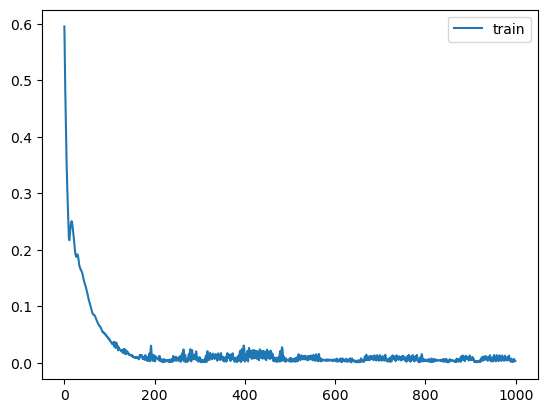

In [52]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [53]:
# make a prediction
yhatlstm = model2.predict(X_test)


1/1 [==============================] - 1s 542ms/step


In [54]:
yhatlstm.shape

(3, 1)

In [55]:
mae = mean_absolute_error(y_test,yhatlstm)
mse = mean_squared_error(y_test, yhatlstm)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.1897425814678794
MSE:  0.050797441537732434
RMSE 0.22538287764986148


In [56]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


In [57]:
mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)

In [58]:
nsamples, nx, ny = X_train.shape
Xt = X_train.reshape((nsamples,nx*ny))
Xt.shape

(16, 43)

In [59]:
nsamples, nx, ny = X_test.shape
Xtst = X_test.reshape((nsamples,nx*ny))
Xtst.shape

(3, 43)

In [60]:
mdl.fit(Xt, y_train)

RandomForestRegressor(n_jobs=6, random_state=0)

In [61]:
y_pred = mdl.predict(Xtst)

In [62]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.12878947368421065
MSE:  0.023275016620498648
RMSE 0.15256151749539806
